<a href="https://colab.research.google.com/github/archanasingh-ml/ml_experiments/blob/main/LinearRegression_Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**
Linear regression is a basic and commonly used type of **predictive analysis**. The overall idea of regression is to examine two things:



1.   Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
2.   Which variables in particular are significant predictors of the outcome variable, and in what way they do impact the outcome variable?


These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :
𝑦=𝛽0+𝛽1𝑥
What does each term represent?

𝑦  is the response/outcome/dependent variable
𝑥  is the feature/indepenent feature
𝛽0  is the intercept
𝛽1  is the coefficient for x
Three major uses for regression analysis are:

1. determining the strength of predictors,


*  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.

2. forecasting an effect, and

*   how much additional sales income do I get for each additional $1000 spent on marketing?

3. trend forecasting.

*   what will the price of house be in 6 months?




**Assumptions of Linear Regression text**
1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

**How to Find Model Acuracy**

Following metrics are used - R-square

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('/content/sample_data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')



In [5]:
data.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [6]:
data.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [71]:
#After pandas profiling , GETTING RID OF ALL NOT SO USEFUL Columns
#Getting Rid of All Extraneous Info

data.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,YearStart,LocationAbbr,LocationDesc,Question,Data_Value,Data_Value_Alt,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.0,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Total,Total
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,High school graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(18.335765, -64.896335)",78,Race/Ethnicity,Asian
53388,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(18.335765, -64.896335)",78,Race/Ethnicity,Hawaiian/Pacific Islander
53389,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(18.335765, -64.896335)",78,Race/Ethnicity,American Indian/Alaska Native
53390,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",78,Race/Ethnicity,2 or more races


**#separating the data on the basis of Gender, Education , Income, Race/Ethnicity**

In [72]:
#separating the data on the basis of Gender, Education , Income, Race/Ethnicity
print(data['Stratification1'].unique()) 
#values are good, no change needed.

['Total' 'Male' 'Female' 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate' '18 - 24' '25 - 34'
 '35 - 44' '45 - 54' '55 - 64' '65 or older' 'Less than $15,000'
 '$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' 'Data not reported'
 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic' 'Asian'
 'Hawaiian/Pacific Islander' 'American Indian/Alaska Native'
 '2 or more races' 'Other']


In [73]:
data_gender = data[(data['Stratification1']=='Male') | (data['Stratification1']=='Female')]

In [74]:
#separating the data on the basis of Gender, Education , Income, Race/Ethnicity
print(data['StratificationCategory1'].unique()) 
#values are good, no change needed.

['Total' 'Gender' 'Education' 'Age (years)' 'Income' 'Race/Ethnicity']


In [75]:
data_edu = data[(data['StratificationCategory1']=='Education')]

In [76]:
data_income = data[(data['StratificationCategory1']=='Income')]

In [77]:
data.rename(columns={'Race/Ethnicity':'Race'}, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

array([nan, 'Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic',
       'Asian', 'Hawaiian/Pacific Islander',
       'American Indian/Alaska Native', '2 or more races', 'Other'],
      dtype=object)

In [78]:

#let's take people of only two types, Hispanic or non-Hispanic
data_hisp = data[(data['Race'] == 'Hispanic')]
data_nonhisp = data[(data['Race'] != 'Hispanic')]

In [79]:
data_gender = data_gender.reset_index(drop = True)
data_edu = data_edu.reset_index(drop = True)
data_income = data_income.reset_index(drop = True)
data_hisp = data_hisp.reset_index(drop = True)
data_nonhisp = data_nonhisp.reset_index(drop = True)

In [80]:
#Let's see what questions were asked
print(data['Question'].unique())

['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic act

In [81]:
#we can choose only those questions which are related to obese/overweight
data_gender = data_gender[(data_gender['Question']== 'Percent of adults aged 18 years and older who have obesity') | (data_gender['Question']== 'Percent of adults aged 18 years and older who have an overweight classification')]

In [82]:
print(data_gender['YearStart'].unique())


[2011 2012 2014 2013 2015 2016]


In [83]:
print(data_gender['LocationDesc'].unique())

['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming'
 'Virgin Islands']


In [84]:
#to make easier, we can select any one year, and locationDesc as National to show the Obesity rate
#choosing year 2016


data_gender = data_gender[data_gender['YearStart']==2016]
data_gender_national=data_gender[data_gender['LocationDesc']=='National']

#Cut out terriotories that our not included within 50 states + DC data
data_gender=data_gender[~(data_gender['LocationDesc']=='National')]
data_gender=data_gender[~(data_gender['LocationDesc']=='Guam')]
data_gender=data_gender[~(data_gender['LocationDesc']=='Puerto Rico')]
data_gender['LocationDesc'].unique()

array(['Arkansas', 'Alabama', 'Alaska', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Virgin Islands'],
      dtype=object)

In [85]:
data_gender_national.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
3484,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Gender,Male,GEN,MALE
3485,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Gender,Female,GEN,FEMALE
3594,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Gender,Male,GEN,MALE
3595,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Gender,Female,GEN,FEMALE


In [86]:
#group data by state and take the mean of men and women rates for each state

sorted_data_gender = data_gender.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_data_gender[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_data_gender = sorted_data_gender.groupby('LocationDesc', as_index=False).mean()

#calculate the average (over men and women) obesity rate for the country

national_mean_obesity_2016=sum(data_gender_national['Data_Value'])/len(data_gender_national)
print(national_mean_obesity_2016)

32.35


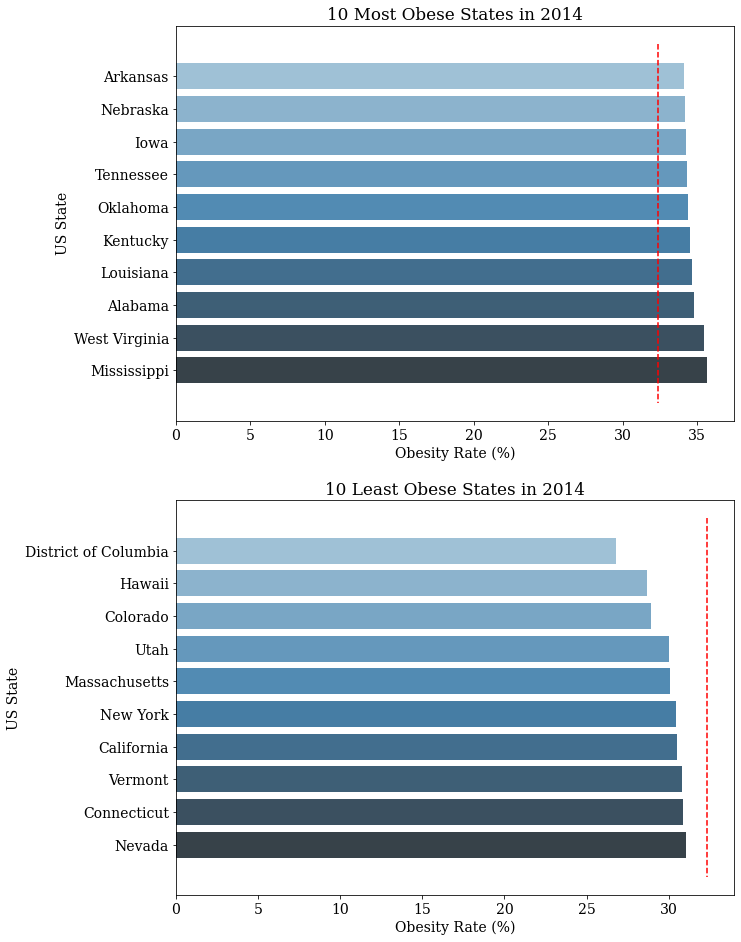

In [87]:
#Let's plot a bar graph of the most and least obese states in the US
#Mark the national average in red

#For those that have LaTex
#plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_data_gender = sorted_data_gender.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_data_gender.tail(10).LocationDesc,x=sorted_data_gender.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')

plt.plot([national_mean_obesity_2016,national_mean_obesity_2016],[-1,10], '--',color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_data_gender.head(10).LocationDesc,x=sorted_data_gender.head(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([national_mean_obesity_2016,national_mean_obesity_2016],[-1,10], '--',color = 'r')

In [95]:
sorted_data_gender.head()
sorted_data_gender.drop(columns=['Data_Value_Unit','YearStart','YearEnd','LocationDesc','Data_Value_Alt'],inplace=True)

In [96]:
sorted_data_gender.head()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
8,26.800,24.300,29.450,1737.5,11.0
11,28.675,26.700,30.700,3829.0,15.0
5,28.925,27.500,30.350,6818.0,8.0
44,30.025,28.350,31.725,5017.5,49.0
21,30.075,28.075,32.100,3739.5,25.0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Y = sorted_data_gender['Data_Value']
X = sorted_data_gender.drop(columns=['Data_Value'])


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.18, random_state=42)

In [103]:
model.fit(X_train,y_train)

print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))

print('Model Coefficients',model.coef_)
print('Model Coefficients',model.intercept_)

R^2 on training... 0.9998830285317787
R^2 on test... 0.9998387689778533
Model Coefficients [ 5.27785167e-01  4.74976036e-01 -3.17246939e-06 -1.41407420e-04]
Model Coefficients 0.010962312034443755
